In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdullah0a/human-age-prediction-synthetic-dataset")

print("Path to dataset files:", path)

100%|██████████| 739k/739k [00:00<00:00, 17.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abdullah0a/human-age-prediction-synthetic-dataset/versions/1


Importing the data

In [ ]:
data=pd.read_csv("/root/.cache/kagglehub/datasets/abdullah0a/human-age-prediction-synthetic-dataset/versions/1/Train.csv")

In [ ]:
datac=data.copy()


In [ ]:
datac

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,161.632502,88.323405,134/91,204.175510,33.807917,112.075747,1.583006,0.665907,27.997736,...,Diabetes,57.820282,Fair,Normal,8.091897,9.846088,9.111205,Undergraduate,High,22
2996,Male,163.443512,93.217007,110/78,197.384424,34.894725,101.177692,1.785129,0.720304,32.866623,...,Heart Disease,68.783715,Good,Normal,2.427081,1.141303,8.578184,Undergraduate,Medium,19
2997,Male,177.857644,86.258847,159/116,238.641542,27.268332,110.548146,0.366012,0.200000,39.756270,...,NaN,50.133807,Fair,Normal,7.671837,5.101134,2.199199,Undergraduate,Low,85
2998,Female,162.287164,41.371018,134/82,198.244328,15.708252,123.704379,1.452963,0.648158,43.338594,...,Hypertension,68.864629,Good,Insomnia,7.920076,4.452130,5.051613,NaN,High,30


In [ ]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       3000 non-null   object 
 1   Height (cm)                  3000 non-null   float64
 2   Weight (kg)                  3000 non-null   float64
 3   Blood Pressure (s/d)         3000 non-null   object 
 4   Cholesterol Level (mg/dL)    3000 non-null   float64
 5   BMI                          3000 non-null   float64
 6   Blood Glucose Level (mg/dL)  3000 non-null   float64
 7   Bone Density (g/cm²)         3000 non-null   float64
 8   Vision Sharpness             3000 non-null   float64
 9   Hearing Ability (dB)         3000 non-null   float64
 10  Physical Activity Level      3000 non-null   object 
 11  Smoking Status               3000 non-null   object 
 12  Alcohol Consumption          1799 non-null   object 
 13  Diet              

Key Findings from Initial Analysis:
No missing values in the dataset.

Numerical Summary:

"Height (cm)": Ranges from 141 cm to 198 cm.
"Weight (kg)": Ranges from 32 kg to 123 kg.
"Cholesterol Level (mg/dL)"
"BMI": Minimum 12.04 (potential underweight cases), maximum 43.33 (potential obesity).
"Blood Glucose Level (mg/dL)": 69.86 to 185.73, likely indicating both normal and diabetic levels.
"Bone Density (g/cm²)": Small negative value (-0.22) – potential data issue.
"Vision Sharpness"
"Cognitive Function"
" Stress Levels"
"Pollution Exposure"
"Sun Exposure"
"
"Hearing Ability (dB)": 0 to 94, with a high max indicating hearing loss.
"Age (years)": 18 to 89 years, fairly distributed.

Categorical Features:

"Blood Pressure (s/d)" has 1,606 unique values (stored as strings). Needs splitting into systolic & diastolic.
"Physical Activity Level", "Smoking Status", "Alcohol Consumption", "Diet", "Chronic Diseases", "Medication Use", "Family History", "Mental Health Status", "Sleep Patterns", "Education Level", "Income Level" have manageable categories (3-4 unique values each).

In [ ]:
# Splitting the 'Blood Pressure (s/d)' column into two new columns
datac[['Systolic_BP', 'Diastolic_BP']] = datac['Blood Pressure (s/d)'].str.split('/', expand=True).astype(float)

# Dropping the original column
datac.drop(columns=['Blood Pressure (s/d)'], inplace=True)

# Display the first few rows to verify
print(datac[['Systolic_BP', 'Diastolic_BP']].head())

   Systolic_BP  Diastolic_BP
0        151.0         109.0
1        134.0         112.0
2        160.0         101.0
3        133.0          94.0
4        170.0         106.0


In [ ]:
datac

,Gender,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,...,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years),Systolic_BP,Diastolic_BP
0,Male,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,...,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89,151.0,109.0
1,Male,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,...,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77,134.0,112.0
2,Female,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,...,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70,160.0,101.0
3,Female,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,...,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52,133.0,94.0
4,Female,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,...,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79,170.0,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,161.632502,88.323405,204.175510,33.807917,112.075747,1.583006,0.665907,27.997736,Moderate,...,Fair,Normal,8.091897,9.846088,9.111205,Undergraduate,High,22,134.0,91.0
2996,Male,163.443512,93.217007,197.384424,34.894725,101.177692,1.785129,0.720304,32.866623,Low,...,Good,Normal,2.427081,1.141303,8.578184,Undergraduate,Medium,19,110.0,78.0
2997,Male,177.857644,86.258847,238.641542,27.268332,110.548146,0.366012,0.200000,39.756270,Moderate,...,Fair,Normal,7.671837,5.101134,2.199199,Undergraduate,Low,85,159.0,116.0
2998,Female,162.287164,41.371018,198.244328,15.708252,123.704379,1.452963,0.648158,43.338594,Moderate,...,Good,Insomnia,7.920076,4.452130,5.051613,NaN,High,30,134.0,82.0


In [ ]:
def move_columns_to_middle(datac, cols_to_move):
    """Moves specified columns to the middle of the DataFrame."""
    cols = list(datac.columns)

    # Finding the middle index
    middle_index = len(cols) // 2

    # Removing the columns to move
    for col in cols_to_move:
        cols.remove(col)

    # Inserting columns at the middle position
    for i, col in enumerate(cols_to_move):
        cols.insert(middle_index + i, col)

    # Reordering the DataFrame
    return datac[cols]

# Example usage: Move 'Systolic_BP' and 'Diastolic_BP' to the middle
datac = move_columns_to_middle(datac, ['Systolic_BP', 'Diastolic_BP'])

# Display the new column order
print(datac.columns)


Index(['Gender', 'Height (cm)', 'Weight (kg)', 'Cholesterol Level (mg/dL)',
       'BMI', 'Blood Glucose Level (mg/dL)', 'Bone Density (g/cm²)',
       'Vision Sharpness', 'Hearing Ability (dB)', 'Physical Activity Level',
       'Smoking Status', 'Alcohol Consumption', 'Diet', 'Systolic_BP',
       'Diastolic_BP', 'Chronic Diseases', 'Medication Use', 'Family History',
       'Cognitive Function', 'Mental Health Status', 'Sleep Patterns',
       'Stress Levels', 'Pollution Exposure', 'Sun Exposure',
       'Education Level', 'Income Level', 'Age (years)'],
      dtype='object')


In [ ]:

datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       3000 non-null   object 
 1   Height (cm)                  3000 non-null   float64
 2   Weight (kg)                  3000 non-null   float64
 3   Cholesterol Level (mg/dL)    3000 non-null   float64
 4   BMI                          3000 non-null   float64
 5   Blood Glucose Level (mg/dL)  3000 non-null   float64
 6   Bone Density (g/cm²)         3000 non-null   float64
 7   Vision Sharpness             3000 non-null   float64
 8   Hearing Ability (dB)         3000 non-null   float64
 9   Physical Activity Level      3000 non-null   object 
 10  Smoking Status               3000 non-null   object 
 11  Alcohol Consumption          1799 non-null   object 
 12  Diet                         3000 non-null   object 
 13  Systolic_BP       

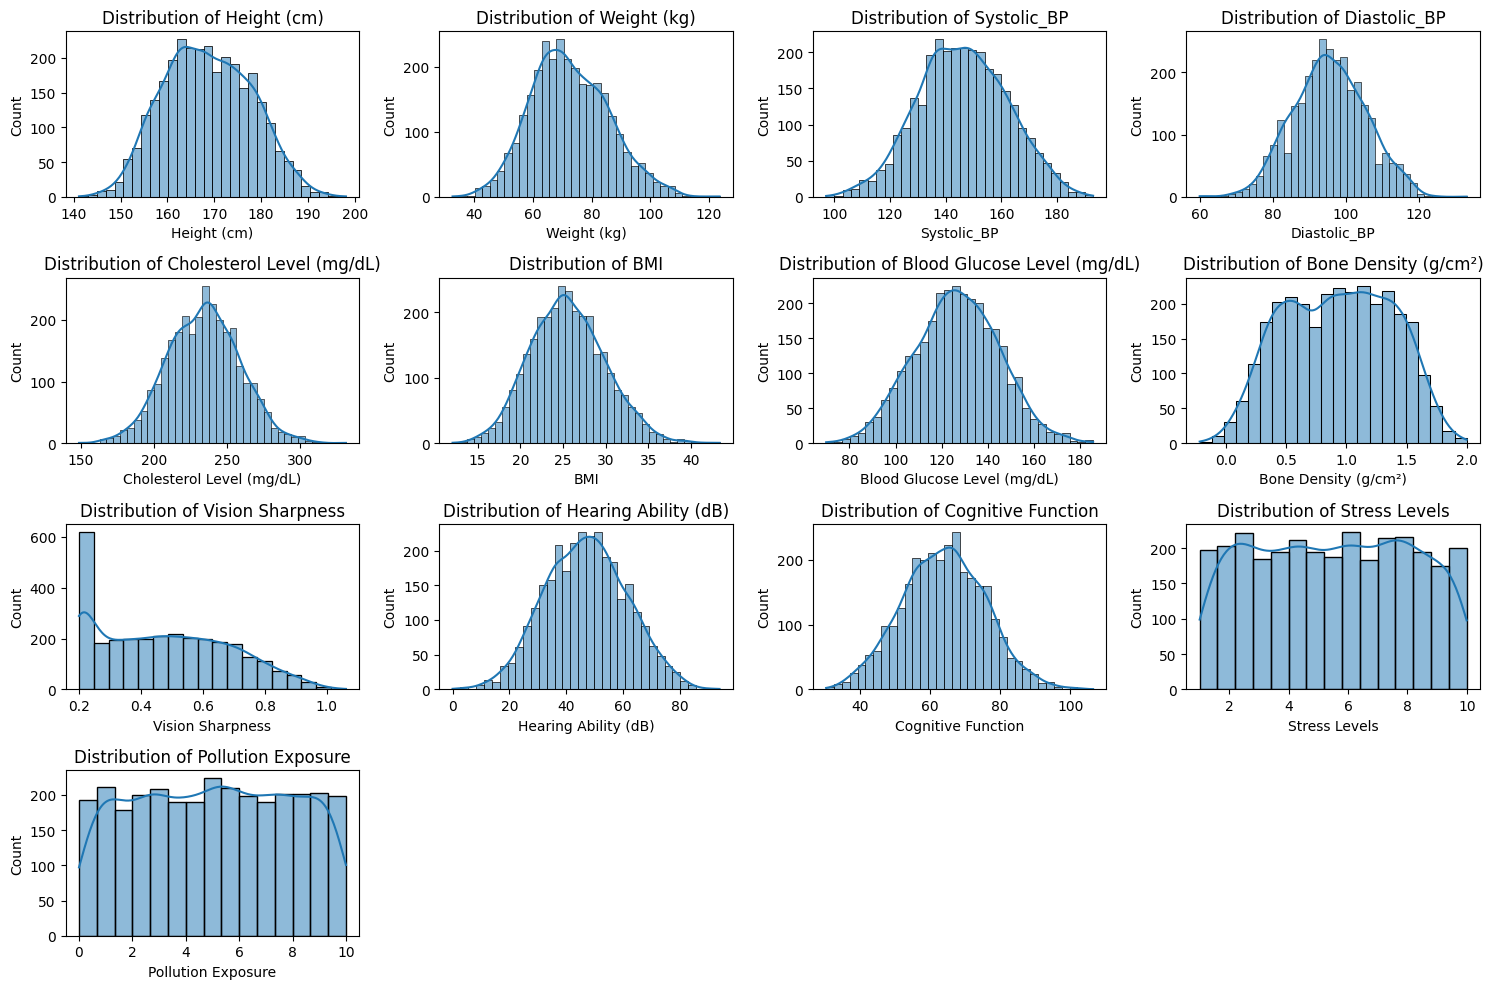

In [ ]:
numerical_features = [
    'Height (cm)', 'Weight (kg)', 'Systolic_BP','Diastolic_BP', 'Cholesterol Level (mg/dL)',
    'BMI', 'Blood Glucose Level (mg/dL)', 'Bone Density (g/cm²)', 'Vision Sharpness',
    'Hearing Ability (dB)','Cognitive Function','Stress Levels','Pollution Exposure'
]

# Plot distributions of numerical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(datac[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

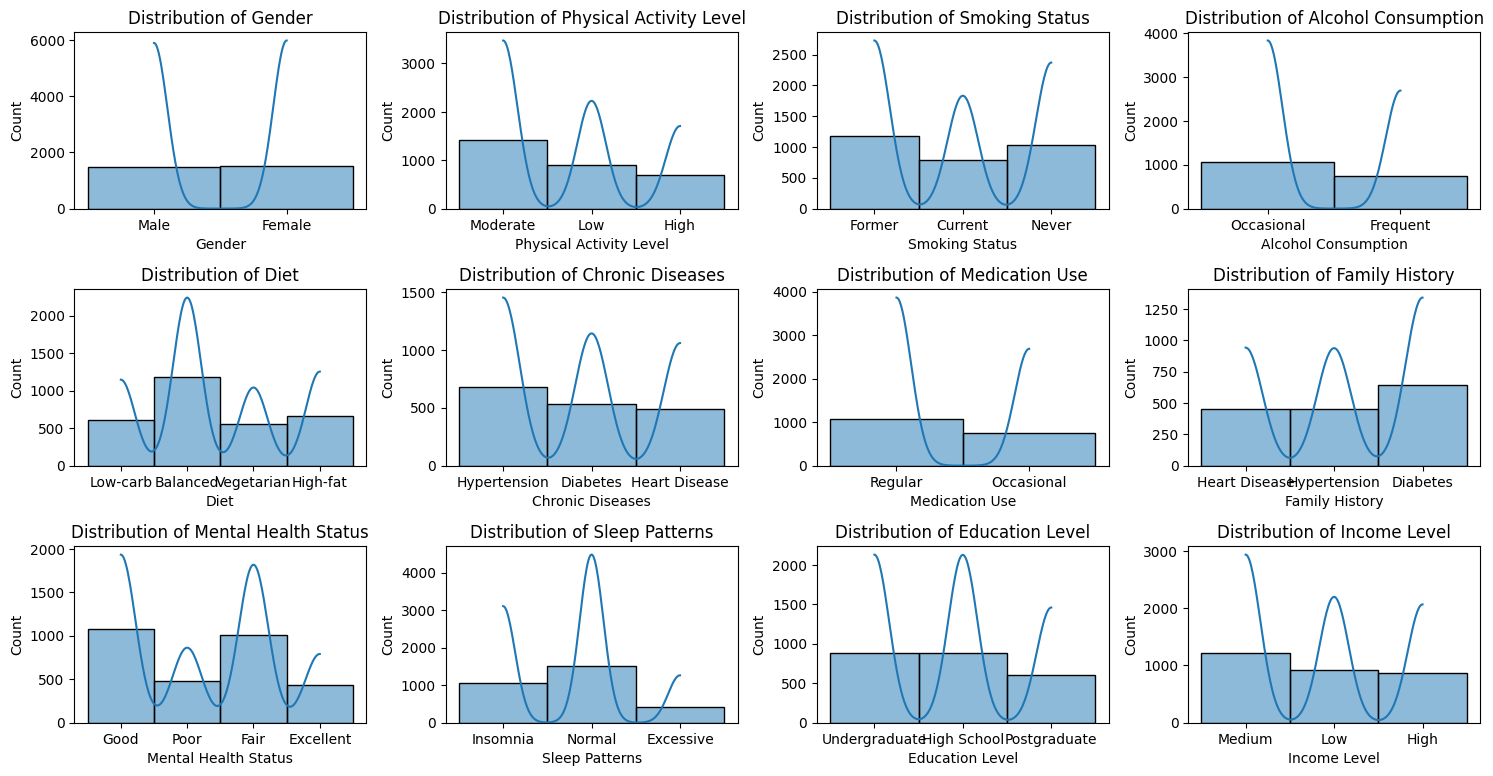

In [ ]:

categorical_features = [
    'Gender','Physical Activity Level','Smoking Status',
    'Alcohol Consumption','Diet','Chronic Diseases','Medication Use',
    'Family History','Mental Health Status','Sleep Patterns','Education Level','Income Level'
]

# Plot distributions of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(datac[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


<ipython-input-13-c82cd4a4092f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=datac ,palette='deep')


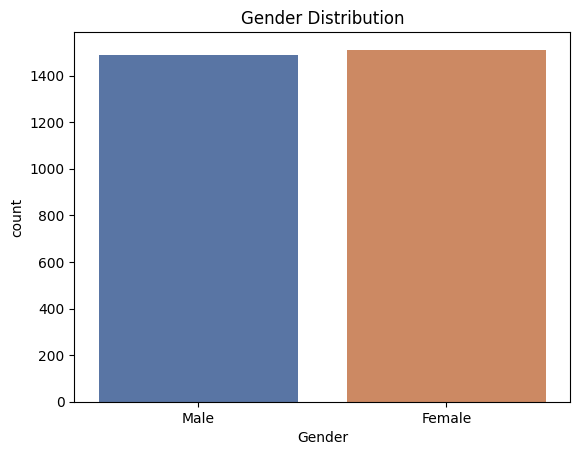

In [ ]:


# Plot the distribution of gender
sns.countplot(x='Gender', data=datac ,palette='deep')
plt.title('Gender Distribution')
plt.show()


<ipython-input-14-9ccd1abdd21f>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(datac[feature], palette="Set2")
<ipython-input-14-9ccd1abdd21f>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(datac[feature], palette="Set2")
<ipython-input-14-9ccd1abdd21f>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(datac[feature], palette="Set2")
<ipython-input-14-9ccd1abdd21f>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the 

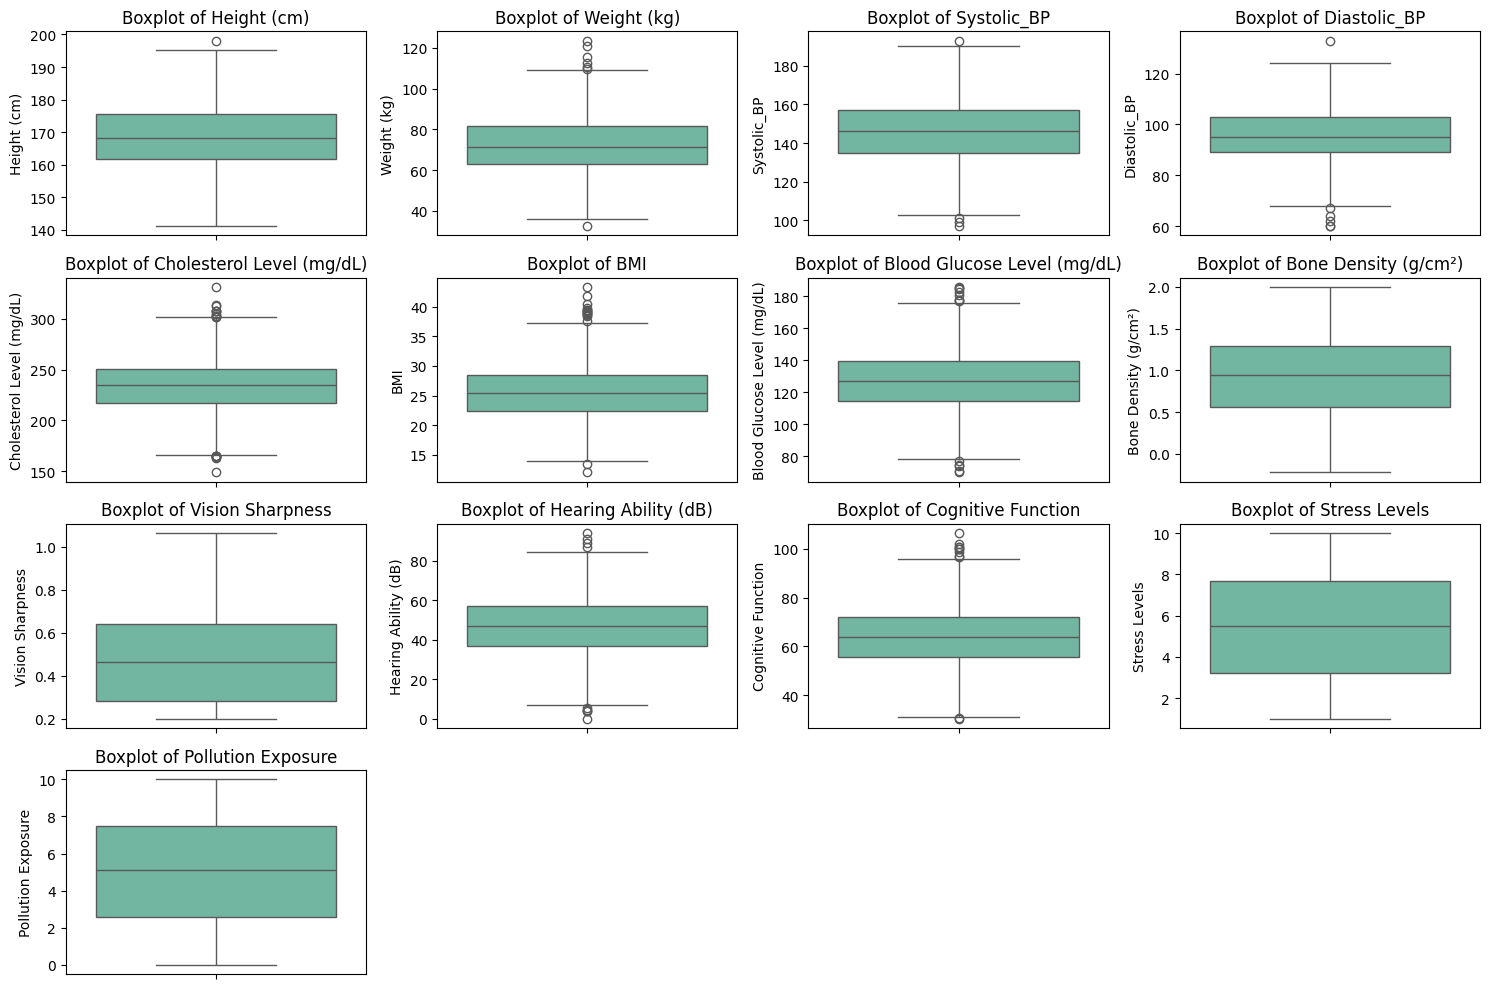

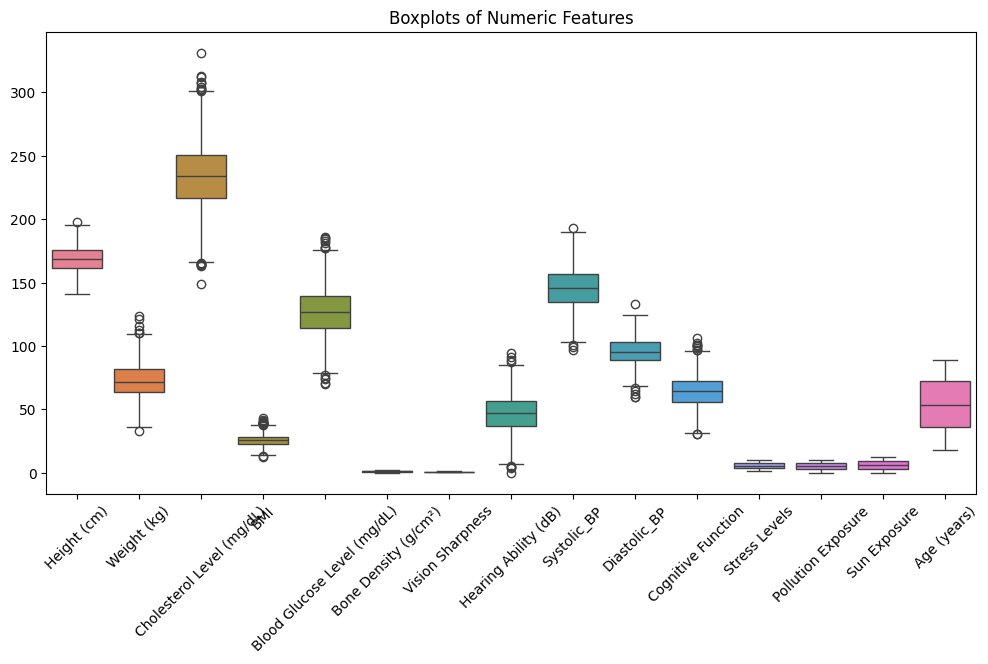

In [ ]:
'''# Set figure size
plt.figure(figsize=(10, 6))

# Create boxplot
sns.boxplot(data=datac[['Gender', 'Height (cm)', 'Weight (kg)', 'Cholesterol Level (mg/dL)',
       'BMI', 'Blood Glucose Level (mg/dL)', 'Bone Density (g/cm²)',
       'Vision Sharpness', 'Hearing Ability (dB)', 'Physical Activity Level',
       'Smoking Status', 'Alcohol Consumption', 'Diet', 'Systolic_BP',
       'Diastolic_BP', 'Chronic Diseases', 'Medication Use', 'Family History',
       'Cognitive Function', 'Mental Health Status', 'Sleep Patterns',
       'Stress Levels', 'Pollution Exposure', 'Sun Exposure',
       'Education Level', 'Income Level', 'Age (years)']], palette="Set2")
plt.subplot(5,6, i)
# Add title and labels
plt.title("Boxplot of Blood Pressure (Systolic & Diastolic)", fontsize=14)
plt.ylabel("Blood Pressure (mmHg)", fontsize=12)

# Show plot
plt.show()'''


numerical_features = [
    'Height (cm)', 'Weight (kg)', 'Systolic_BP','Diastolic_BP', 'Cholesterol Level (mg/dL)',
    'BMI', 'Blood Glucose Level (mg/dL)', 'Bone Density (g/cm²)', 'Vision Sharpness',
    'Hearing Ability (dB)','Cognitive Function','Stress Levels','Pollution Exposure'
]

# Plot distributions of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(datac[feature], palette="Set2")
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=datac)
plt.xticks(rotation=45)
plt.title('Boxplots of Numeric Features')
plt.show()


In [ ]:
for col in datac.select_dtypes(include=['float64', 'int64']).columns:  # Process only numeric columns
    Q1 = datac[col].quantile(0.25)
    Q3 = datac[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    datac[col] = datac[col].clip(lower=lower_whisker, upper=upper_whisker)  # Capping outliers

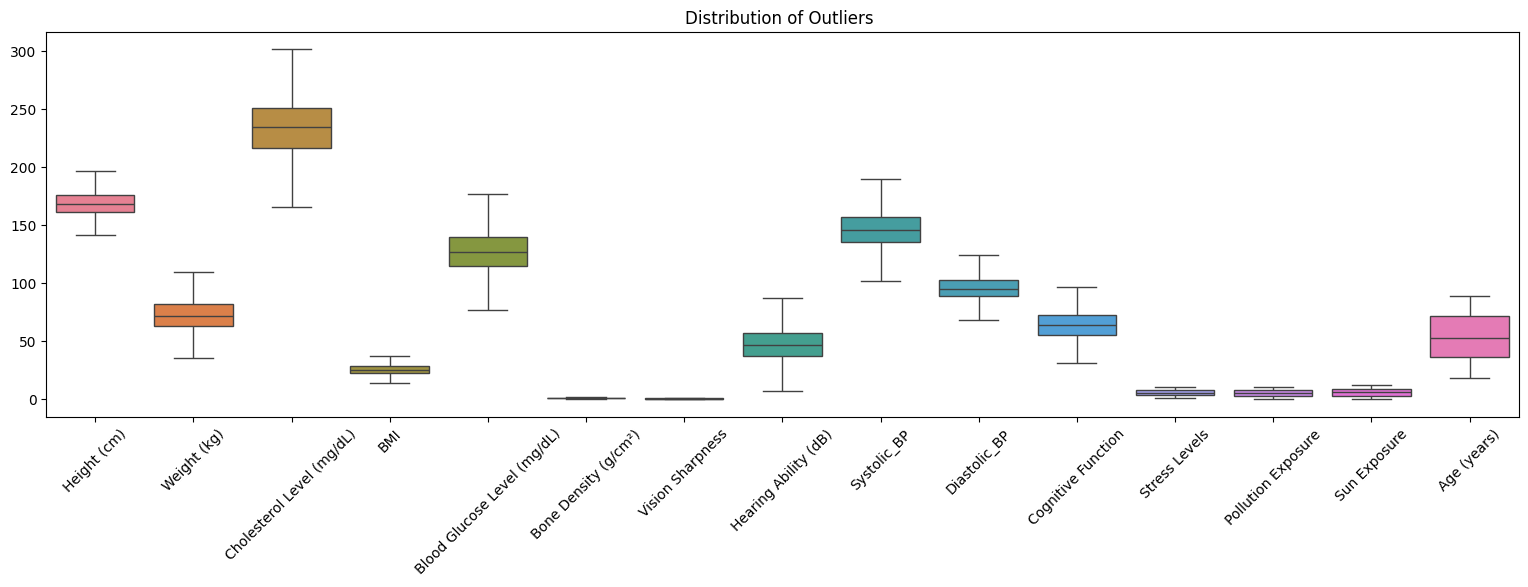

In [ ]:
plt.figure(figsize=(19, 5))
sns.boxplot(data=datac)
plt.xticks(rotation=45)
plt.title("Distribution of Outliers ")
plt.show()

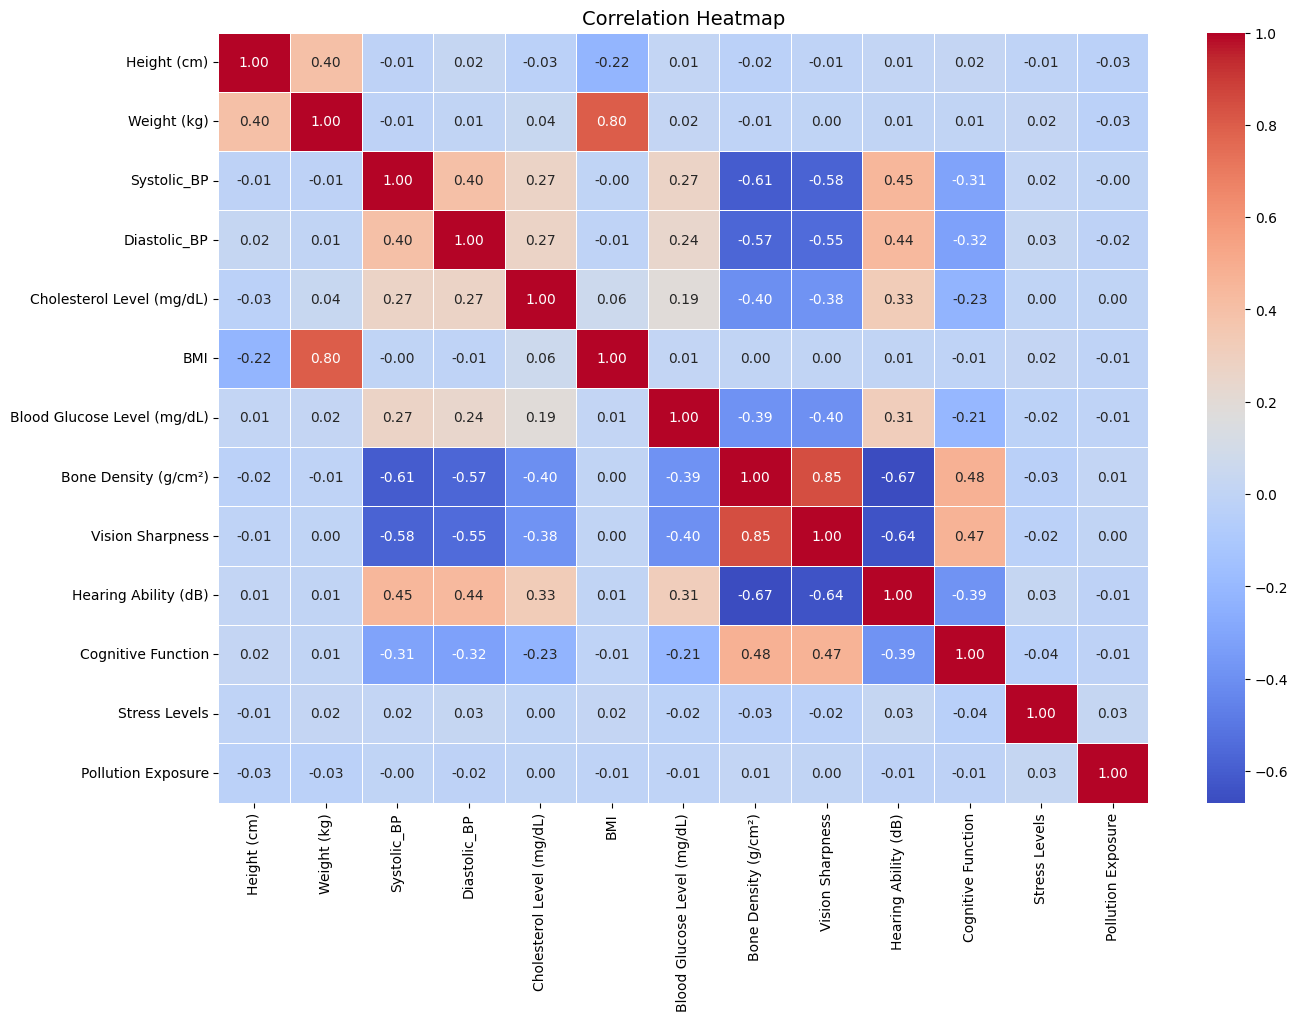

In [ ]:
# Compute the correlation matrix (only for numerical columns)
# Ensure only numerical columns are used
#datac_numeric = datac.select_dtypes(include=['number'])

# Handle missing values (drop or fill)
#datac_numeric = datac_numeric.fillna(datac_numeric.mean())

# Remove constant columns
#datac_numeric = datac_numeric.loc[:, datac_numeric.nunique() > 1]

# Compute correlation
# Select only numerical columns and compute correlation
corr_matrix = datac[['Height (cm)', 'Weight (kg)', 'Systolic_BP', 'Diastolic_BP',
    'Cholesterol Level (mg/dL)', 'BMI', 'Blood Glucose Level (mg/dL)', 'Bone Density (g/cm²)',
    'Vision Sharpness', 'Hearing Ability (dB)', 'Cognitive Function', 'Stress Levels',
    'Pollution Exposure']].corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 10})

# Add title
plt.title("Correlation Heatmap", fontsize=14)

# Show plot
plt.show()

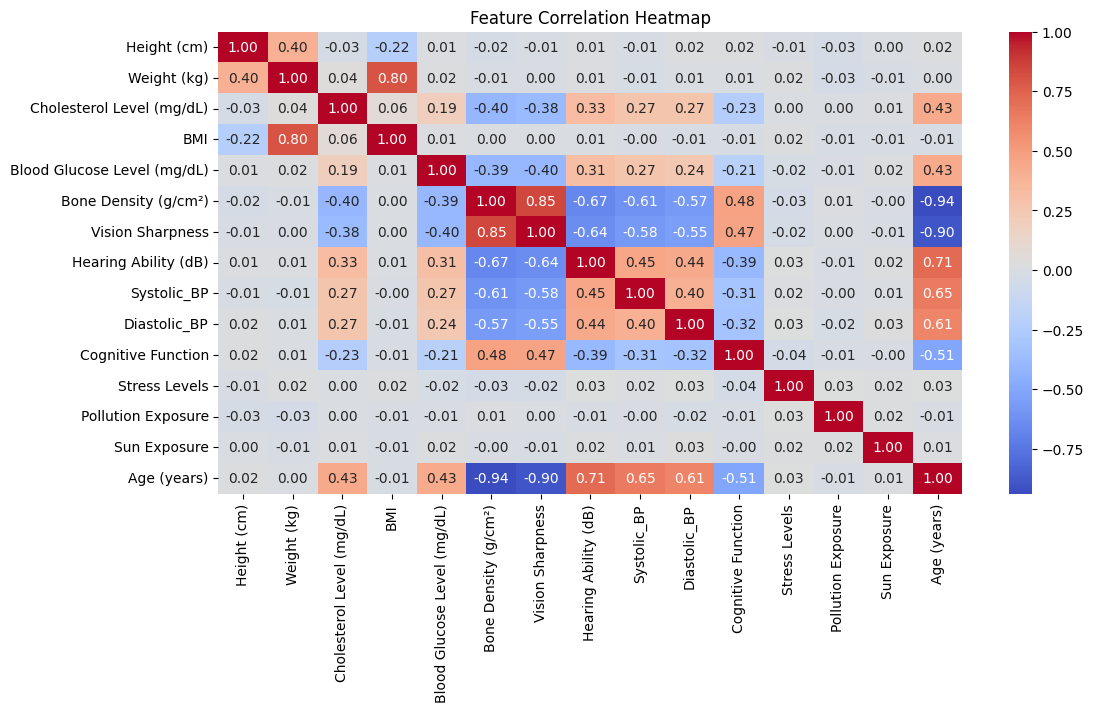

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(datac.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
datac

,Gender,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,161.632502,88.323405,204.175510,33.807917,112.075747,1.583006,0.665907,27.997736,Moderate,...,Diabetes,57.820282,Fair,Normal,8.091897,9.846088,9.111205,Undergraduate,High,22
2996,Male,163.443512,93.217007,197.384424,34.894725,101.177692,1.785129,0.720304,32.866623,Low,...,Heart Disease,68.783715,Good,Normal,2.427081,1.141303,8.578184,Undergraduate,Medium,19
2997,Male,177.857644,86.258847,238.641542,27.268332,110.548146,0.366012,0.200000,39.756270,Moderate,...,NaN,50.133807,Fair,Normal,7.671837,5.101134,2.199199,Undergraduate,Low,85
2998,Female,162.287164,41.371018,198.244328,15.708252,123.704379,1.452963,0.648158,43.338594,Moderate,...,Hypertension,68.864629,Good,Insomnia,7.920076,4.452130,5.051613,NaN,High,30


In [ ]:
x=datac.iloc[:,:-1]
y=datac.iloc[:,-1]
x.head()
y.head()

,Age (years)
0,89
1,77
2,70
3,52
4,79


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x.head()

,Gender,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,...,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level
0,Male,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,...,NaN,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium
1,Male,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,...,NaN,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium
2,Female,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,...,Regular,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium
3,Female,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,...,Occasional,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low
4,Female,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,...,NaN,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High


In [ ]:
# pipeline

In [ ]:
num_cols = x_train.select_dtypes(exclude = "object").columns.values

In [ ]:
num_cols

array(['Height (cm)', 'Weight (kg)', 'Cholesterol Level (mg/dL)', 'BMI',
       'Blood Glucose Level (mg/dL)', 'Bone Density (g/cm²)',
       'Vision Sharpness', 'Hearing Ability (dB)', 'Systolic_BP',
       'Diastolic_BP', 'Cognitive Function', 'Stress Levels',
       'Pollution Exposure', 'Sun Exposure'], dtype=object)

In [ ]:
cat_cols = x_train.select_dtypes(include = "object").columns.values

In [ ]:
sklearn.__version__

'1.6.1'

In [ ]:
cat_cols


array(['Gender', 'Physical Activity Level', 'Smoking Status',
       'Alcohol Consumption', 'Diet', 'Chronic Diseases',
       'Medication Use', 'Family History', 'Mental Health Status',
       'Sleep Patterns', 'Education Level', 'Income Level'], dtype=object)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
cont_pl = Pipeline(steps = [('Scaling',StandardScaler())])
cat_pl = Pipeline(steps = [('Encoding',OneHotEncoder(drop = "first",sparse_output = False))])

In [ ]:
ct = ColumnTransformer(transformers = [('continuous',cont_pl,[1,2,3,4,5,6,7,8,13,14,18,21,22,23]),
                                       ('categorical',cat_pl,[0,9,10,11,12,15,15,17,19,20,24,25])])

In [ ]:

ct

ColumnTransformer(transformers=[('continuous',
                                 Pipeline(steps=[('Scaling',
                                                  StandardScaler())]),
                                 [1, 2, 3, 4, 5, 6, 7, 8, 13, 14, 18, 21, 22,
                                  23]),
                                ('categorical',
                                 Pipeline(steps=[('Encoding',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 [0, 9, 10, 11, 12, 15, 15, 17, 19, 20, 24,
                                  25])])

In [ ]:


# Define pipeline (preprocessing + model)
pipeline = Pipeline([
    ('preprocessing', ct),
    ('model', LinearRegression())  # Regression model
])

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [ ]:
pipe_xtrain=pipeline.fit(x_train,y_train)
pipe_xtest=pipeline.predict(x_test)

In [ ]:
pipe_xtrain

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler())]),
                                                  [1, 2, 3, 4, 5, 6, 7, 8, 13,
                                                   14, 18, 21, 22, 23]),
                                                 ('categorical',
                                                  Pipeline(steps=[('Encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  [0, 9, 10, 11, 12, 15, 15, 17,
                                                   19, 20, 24, 25])])),
                ('model', LinearRegression())])

In [ ]:
pipe_xtest

array([71.3301756 , 53.34263289, 45.92444792, 62.04569408, 49.60368305,
       29.88231818, 54.98456743, 45.5187263 , 25.63008418, 62.44784383,
       46.27458739, 22.01378148, 22.4366579 , 84.80902094, 51.48802529,
       82.43308423, 78.5943617 , 30.21630601, 75.6615303 , 76.57222974,
       24.19214097, 62.80109883, 75.973044  , 16.58728987, 69.89773271,
       81.94256114, 30.81133164, 33.90402943, 82.11863243, 40.78964827,
       89.74824704, 19.14421578, 58.19664438, 36.20280055, 38.47803919,
       62.90692873, 18.00951757, 31.80956423, 52.10614939, 80.67590898,
       64.79846317, 70.68713597, 56.27564588, 87.00168397, 67.7480006 ,
       80.77328454, 86.15936382, 48.06570363, 54.03258599, 49.56779429,
       84.65747287, 52.89719316, 71.93924458, 58.98896607, 62.44859602,
       42.75367572, 72.36808919, 49.10349859, 44.59243567, 86.46071521,
       69.54597082, 43.79435206, 32.46271093, 46.01227893, 21.59153955,
       70.42635637, 48.30120501, 46.92113061, 48.01211105, 35.01

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.2 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
from sklearn.preprocessing import  StandardScaler, LabelEncoder
from sklearn.model_selection import  train_test_split, cross_val_score,cross_validate
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, VotingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [ ]:
def objective(trial):
    # Define hyperparameters
    t1 = trial.suggest_int("k", 1, 20)
    w1 = trial.suggest_categorical("weights", ["uniform", "distance"])
    t2 = trial.suggest_int("k1", 21, 50)
    w2 = trial.suggest_categorical("weights1", ["uniform", "distance"])
    md1 = trial.suggest_int("max_depth_dt1", 1, 20)
    n_estimators_rf = trial.suggest_int("n_estimators", 50, 200)
    max_depth_rf = trial.suggest_int("max_depth_rf", 5, 30)
    min_samples_split_rf = trial.suggest_int("min_samples_split_rf", 2, 20)
    min_samples_leaf_rf = trial.suggest_int("min_samples_leaf_rf", 1, 20)

    # Define models
    model1 = KNeighborsRegressor(n_neighbors=t1, weights=w1)
    model2 = KNeighborsRegressor(n_neighbors=t2, weights=w2)
    model3 = DecisionTreeRegressor(max_depth=md1)
    model4 = RandomForestRegressor(n_estimators=n_estimators_rf,
                                   max_depth=max_depth_rf,
                                   min_samples_split=min_samples_split_rf,
                                   min_samples_leaf=min_samples_leaf_rf)

    # Create a pipeline with a Voting Regressor
    pipeline = Pipeline([('preprocessor',ct),
        ('voting_regressor', VotingRegressor(estimators=[('knn1', model1), ('knn2', model2), ('dt1', model3), ('rf1', model4)]))
    ])

    # Cross-validation
    cross_val = cross_validate(pipeline, x_train, y_train, cv=5, scoring="r2", return_train_score=True)

    # Save training accuracy as user attribute
    trial.set_user_attr('train_accu', cross_val['train_score'].mean())

    # Return the mean test score for optimization
    return np.mean(cross_val['test_score'])


In [ ]:
study6=optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler())

[I 2025-03-19 03:20:15,300] A new study created in memory with name: no-name-5221e30c-12f2-44ee-9cf2-af9f724058be


In [ ]:
study6.optimize(objective,n_trials=20)

[I 2025-03-19 03:20:39,023] Trial 0 finished with value: 0.9194201460090243 and parameters: {'k': 2, 'weights': 'distance', 'k1': 37, 'weights1': 'distance', 'max_depth_dt1': 13, 'n_estimators': 90, 'max_depth_rf': 13, 'min_samples_split_rf': 17, 'min_samples_leaf_rf': 1}. Best is trial 0 with value: 0.9194201460090243.
[I 2025-03-19 03:20:46,011] Trial 1 finished with value: 0.9239827802475817 and parameters: {'k': 18, 'weights': 'distance', 'k1': 23, 'weights1': 'distance', 'max_depth_dt1': 16, 'n_estimators': 57, 'max_depth_rf': 9, 'min_samples_split_rf': 16, 'min_samples_leaf_rf': 13}. Best is trial 1 with value: 0.9239827802475817.
[I 2025-03-19 03:21:05,494] Trial 2 finished with value: 0.9222739689981289 and parameters: {'k': 2, 'weights': 'distance', 'k1': 28, 'weights1': 'distance', 'max_depth_dt1': 4, 'n_estimators': 191, 'max_depth_rf': 11, 'min_samples_split_rf': 18, 'min_samples_leaf_rf': 19}. Best is trial 1 with value: 0.9239827802475817.
[I 2025-03-19 03:21:20,147] Tria

In [ ]:
study6.best_params

{'k': 15,
 'weights': 'uniform',
 'k1': 26,
 'weights1': 'uniform',
 'max_depth_dt1': 6,
 'n_estimators': 151,
 'max_depth_rf': 20,
 'min_samples_split_rf': 14,
 'min_samples_leaf_rf': 6}

In [ ]:
model11 = KNeighborsRegressor(n_neighbors=15, weights='uniform')
model12 = KNeighborsRegressor(n_neighbors=26, weights='uniform')
model13 = DecisionTreeRegressor(max_depth=6)
model14 = RandomForestRegressor(n_estimators=151,
                                   max_depth=20,
                                   min_samples_split=14,
                                   min_samples_leaf=6)

In [ ]:
# Define pipeline (preprocessing + model)
pipeline = Pipeline([
    ('preprocessing', ct),
    ('model', VotingRegressor([('knn1',model11),('knn2',model12),('dt',model13),('rf',model14)]))  # Regression model
])

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
study6.best_value

0.9282723918893854

In [ ]:
df=study6.trials_dataframe()
df.head()

,number,value,datetime_start,datetime_complete,duration,params_k,params_k1,params_max_depth_dt1,params_max_depth_rf,params_min_samples_leaf_rf,params_min_samples_split_rf,params_n_estimators,params_weights,params_weights1,user_attrs_train_accu,state
0,0,0.919420,2025-03-19 03:20:17.843984,2025-03-19 03:20:39.022601,0 days 00:00:21.178617,2,37,13,13,1,17,90,distance,distance,0.998007,COMPLETE
1,1,0.923983,2025-03-19 03:20:39.024575,2025-03-19 03:20:46.011230,0 days 00:00:06.986655,18,23,16,9,13,16,57,distance,distance,0.997133,COMPLETE
2,2,0.922274,2025-03-19 03:20:46.012807,2025-03-19 03:21:05.494005,0 days 00:00:19.481198,2,28,4,11,19,18,191,distance,distance,0.983937,COMPLETE
3,3,0.925062,2025-03-19 03:21:05.502483,2025-03-19 03:21:20.146652,0 days 00:00:14.644169,18,24,3,17,17,13,53,uniform,distance,0.964847,COMPLETE
4,4,0.899735,2025-03-19 03:21:20.161212,2025-03-19 03:21:58.863524,0 days 00:00:38.702312,3,42,1,21,1,16,163,distance,uniform,0.949862,COMPLETE


In [ ]:
r2_score(y_test, pipe_xtest)

0.9304935742546038

In [ ]:
final_pl=pipeline.fit(x_train,y_train)

In [ ]:
import pickle

In [ ]:
pickle.dump(final_pl,open('Prediction of Age.pkl','wb'))

'/content'

In [ ]:
predict = pickle.load(open('Age prediction.pkl','rb'))